# Проект. Предсказание коэффициента восстановления золота

## Описание проекта

Необходимо подготовить прототип модели машинного обучения для компании «Цифра». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Для проекта предоставлены данные с параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Цели проекта

* Подготовить данные;
* Провести исследовательский анализ данных;
* Построить и обучить модель.

------

## 1. Подготовка данных

### 1.1 Общая информация о данных

Импортируем необходимые модули и библиотеки.

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Normalizer

Сохраним обучающую выборку, тестовую выборку и исходные данные в переменных.

In [8]:
data = pd.read_csv('./gold_recovery_train.csv')
data_test = pd.read_csv('./gold_recovery_test.csv')
data_full = pd.read_csv('./gold_recovery_full.csv')

Изучим информацию о данных.

In [9]:
data.head().T

,0,1,2,3,4
date,2016-01-15 00:00:00,2016-01-15 01:00:00,2016-01-15 02:00:00,2016-01-15 03:00:00,2016-01-15 04:00:00
final.output.concentrate_ag,6.0554,6.02937,6.05593,6.04798,6.1486
final.output.concentrate_pb,9.88965,9.96894,10.214,9.97702,10.1425
final.output.concentrate_sol,5.50732,5.25778,5.38376,4.85863,4.93942
final.output.concentrate_au,42.192,42.7016,42.6575,42.6898,42.7741
...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,-498.31,-500.17,-500.129,-499.202,-501.687
secondary_cleaner.state.floatbank5_b_air,8.07967,7.98476,8.01388,7.97732,7.89424
secondary_cleaner.state.floatbank5_b_level,-500.471,-500.582,-500.518,-500.256,-500.356
secondary_cleaner.state.floatbank6_a_air,14.1513,13.9984,14.0287,14.0056,13.9966


In [10]:
data_full.head().T

,0,1,2,3,4
date,2016-01-15 00:00:00,2016-01-15 01:00:00,2016-01-15 02:00:00,2016-01-15 03:00:00,2016-01-15 04:00:00
final.output.concentrate_ag,6.0554,6.02937,6.05593,6.04798,6.1486
final.output.concentrate_pb,9.88965,9.96894,10.214,9.97702,10.1425
final.output.concentrate_sol,5.50732,5.25778,5.38376,4.85863,4.93942
final.output.concentrate_au,42.192,42.7016,42.6575,42.6898,42.7741
...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,-498.31,-500.17,-500.129,-499.202,-501.687
secondary_cleaner.state.floatbank5_b_air,8.07967,7.98476,8.01388,7.97732,7.89424
secondary_cleaner.state.floatbank5_b_level,-500.471,-500.582,-500.518,-500.256,-500.356
secondary_cleaner.state.floatbank6_a_air,14.1513,13.9984,14.0287,14.0056,13.9966


In [11]:
data_test.head().T

,0,1,2,3,4
date,2016-09-01 00:59:59,2016-09-01 01:59:59,2016-09-01 02:59:59,2016-09-01 03:59:59,2016-09-01 04:59:59
primary_cleaner.input.sulfate,210.801,215.392,215.26,215.336,199.099
primary_cleaner.input.depressant,14.9931,14.9875,12.8849,12.0068,10.6825
primary_cleaner.input.feed_size,8.08,8.08,7.78667,7.64,7.53
primary_cleaner.input.xanthate,1.00502,0.990469,0.996043,0.863514,0.805575
primary_cleaner.state.floatbank8_a_air,1398.98,1398.78,1398.49,1399.62,1401.27
primary_cleaner.state.floatbank8_a_level,-500.226,-500.057,-500.868,-498.864,-500.808
primary_cleaner.state.floatbank8_b_air,1399.14,1398.06,1398.86,1397.44,1398.13
primary_cleaner.state.floatbank8_b_level,-499.92,-499.778,-499.765,-499.211,-499.505
primary_cleaner.state.floatbank8_c_air,1400.1,1396.15,1398.08,1400.13,1402.17


In [12]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
primary_cleaner.input.sulfate,5554.0,170.515243,49.608602,0.000103,143.340022,176.103893,207.240761,274.409626
primary_cleaner.input.depressant,5572.0,8.482873,3.353105,0.000031,6.411500,8.023252,10.017725,40.024582
primary_cleaner.input.feed_size,5856.0,7.264651,0.611526,5.650000,6.885625,7.259333,7.650000,15.500000
primary_cleaner.input.xanthate,5690.0,1.321420,0.693246,0.000003,0.888769,1.183362,1.763797,5.433169
primary_cleaner.state.floatbank8_a_air,5840.0,1481.990241,310.453166,0.000000,1497.190681,1554.659783,1601.681656,2212.432090
primary_cleaner.state.floatbank8_a_level,5840.0,-509.057796,61.339256,-799.773788,-500.455211,-499.997402,-499.575313,-57.195404
primary_cleaner.state.floatbank8_b_air,5840.0,1486.908670,313.224286,0.000000,1497.150234,1553.268084,1601.784707,1975.147923
primary_cleaner.state.floatbank8_b_level,5840.0,-511.743956,67.139074,-800.029078,-500.936639,-500.066588,-499.323361,-142.527229
primary_cleaner.state.floatbank8_c_air,5840.0,1468.495216,309.980748,0.000000,1437.050321,1546.160672,1600.785573,1715.053773
primary_cleaner.state.floatbank8_c_level,5840.0,-509.741212,62.671873,-799.995127,-501.300441,-500.079537,-499.009545,-150.937035


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [14]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [15]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

В обучающей выборке и в полных данных 87 колонок, в тестовой выборке 53 колонки. Обучающая и тестовая выборки разделены в пропорции 3 : 1. В данных имеются пропуски.

Целевыми признаками являются столбцы *'rougher.output.recovery'* и *'final.output.recovery'*, это количественные значения, поэтому в данном проекте будет решаться задача регрессии.

Проверим данные на наличие дубликатов.

In [16]:
data_full.duplicated().sum()

0

Дубликатов нет.

Для быстрого доступа к названиям столбцов данных выведем на экран названия столбцов выборки `data`.

In [17]:
data.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

### 1.2 Проверка эффективности обогащения

По инструкции выполнения проекта необходимо проверить правильность расчета эффективности обогащения для признака `rougher.output.recovery`. Запишем в переменную `check` значения столбца *'rougher.output.recovery'*.

In [18]:
check = data.loc[:, ['rougher.output.recovery']]

Посмотрим, что получилось.

In [19]:
check

,rougher.output.recovery
0,87.107763
1,86.843261
2,86.842308
3,87.226430
4,86.688794
...,...
16855,89.574376
16856,87.724007
16857,88.890579
16858,89.858126


Напишем функцию `recovery`, которая будет считать эффективность обогащения. Она принимает на вход три аргумента:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

In [20]:
def recovery(C, F, T):
    return 100 * C * ((F - T) / (F * (C - T)))

Посчитаем эффективность обогащения, запишем значения в столбец *'my_recovery'* таблицы `check`.

In [21]:
check['my_recovery'] = recovery(data['rougher.output.concentrate_au'], data['rougher.input.feed_au'], data['rougher.output.tail_au'])

Выведем таблицу на экран.

In [22]:
check

,rougher.output.recovery,my_recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
16855,89.574376,89.574376
16856,87.724007,87.724007
16857,88.890579,88.890579
16858,89.858126,89.858126


Вроде значения похожи, для полной уверенности необходимо посчитать MAE между исходными и посчитанными значениями.
Выведем на экран информацию о таблице `check`.

In [23]:
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  14287 non-null  float64
 1   my_recovery              14577 non-null  float64
dtypes: float64(2)
memory usage: 263.6 KB


В таблице есть пропуски. Для подсчета MAE удалим пропущенные строки из таблицы.

In [24]:
check = check.dropna()

Посчитаем MAE.

In [25]:
MAE = mean_absolute_error(check['rougher.output.recovery'], check['my_recovery'])

In [26]:
MAE

1.1282514239891264e-14

Можно с полной уверенностью сказать, что исходные значения *'rougher.output.recovery'* посчитаны правильно.

* На данном этапе выяснился важный момент, что посчитанных значений эффективности обогащения оказалось больше, чем есть исходных, таким образом часть пропущенных значений *'rougher.output.recovery'* и *'final.output.recovery'* можно восстановить.

<font color="blue"> Но также оказалось, что среди посчитанных по формуле значений есть -inf, inf, поэтому я отказался от идеи пересчитывать эффективности. </font>

* Также по условию проекта в тестовой выборке отсутствуют целевые признаки, но предсказания модели на тестовой выборке нужно будет как-то оценить, поэтому было решено восстановленные значения целевых признаков исходного датасета добавить к тестовой выборке.

### 1.3 Добавление целевых признаков в тестовую выборку 

Для добавления целевых признаков в тестовую выборку будем использовать значения столбца *'date'*, которые являются уникальными идентификаторами строк.

Создадим выборку `rec_for_test` из исходного датасета. Возьмем необходимые столбцы.

In [27]:
rec_for_test = data_full.loc[:, ['date', 'rougher.output.recovery', 'final.output.recovery']]

Добавим к тестовой выборке `data_test` соответствующие по дате значения *'rougher.output.recovery'* и *'final.output.recovery'* из выборки `rec_for_test`.

In [28]:
data_test = data_test.merge(rec_for_test, on='date', how='left')

Теперь по тестовой выборке можно будет объективно оценить предсказанные значения.

### 1.4 Анализ признаков, недоступных в тестовой выборке

Создадим переменные, в которые запишем списки с названиями столбцов обучающей и тестовой выборок.

In [29]:
full_list = data.columns
part_list = data_test.columns

Найдем признаки, которые отсутствуют в тестовой выборке.

In [30]:
lack_list = []                      # создаем пустой список для хранений отсутствующих признаков
for element in full_list:           # перебираем элементы в full_list
    if element not in part_list:    # проверяем отсутствует ли такой же элемент в part_list
        lack_list.append(element)   # если отсутствует, то добавляем его в список lack_list

Проверим, что получилось.

In [31]:
len(full_list)

87

In [32]:
len(part_list)

55

In [33]:
len(lack_list)

32

Судя по цифрам, все правильно.

Выведем список отсутствующих признаков на экран.

In [34]:
lack_list

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'rougher.output.tail_au',
 'secondary_cleane

* Недоступные признаки в тестовой выборке - это параметры продукта после флотации, после первой и второй очистки, финальные параметры и расчетные характеристики на этапе флотации. Это вторичные признаки, то есть они зависят от входных параметров продукта и от параметров процессов, которые задаются на каждом этапе. Обучению модели такие признаки будут скорее всего только мешать, а так как их нет в тестовой выборке, то их можно удалить и из обучающей выборки.

### 1.5 Работа с пропусками

Удалим отсутствующие в тестовой выборке признаки из обучающей выборки. Также удалим столбец *'date'* из обеих выборок.

In [35]:
data_var = data.drop(lack_list+['date'], axis=1)
data_test_var = data_test.drop(['date'], axis=1)

На данный момент попробуем удалить пропуски и посмотрим, как много данных останется. В описании проекта есть информация о том, соседние по времени параметры часто похожи. А разбираться отдельно вручную с каждым столбцом с пропущенными значениями займет очень много времени, так как пропусков достаточное количество. Можно конечно заменить пропуски медианами или средним, но это тоже внесет искажения в данные. Попробуем вариант с удалением пропусков.

In [36]:
data_var = data_var.dropna()

Займемся заменой пропусков в тестовой выборке. Для заполнения пропущенных значений, которых не очень много используем метод `interpolate()`, с заменой значения на ближайшее. Остальные пропуски заменим медианами значений.

In [37]:
names = ['final.output.recovery', 'rougher.output.recovery', 'rougher.input.floatbank10_sulfate', 
         'rougher.input.floatbank11_xanthate', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant']

for i in names:
    data_test_var[i] = data_test_var[i].fillna(data_test_var[i].median())

data_test_var = data_test_var.interpolate(method='nearest', limit=35, limit_direction='both')

Проверим наличие пропусков.

In [38]:
data_test_var.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

## 2. Анализ данных

### 2.1 Концентрация металлов на различных этапах очистки

Для анализа изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки построим диаграммы размаха.

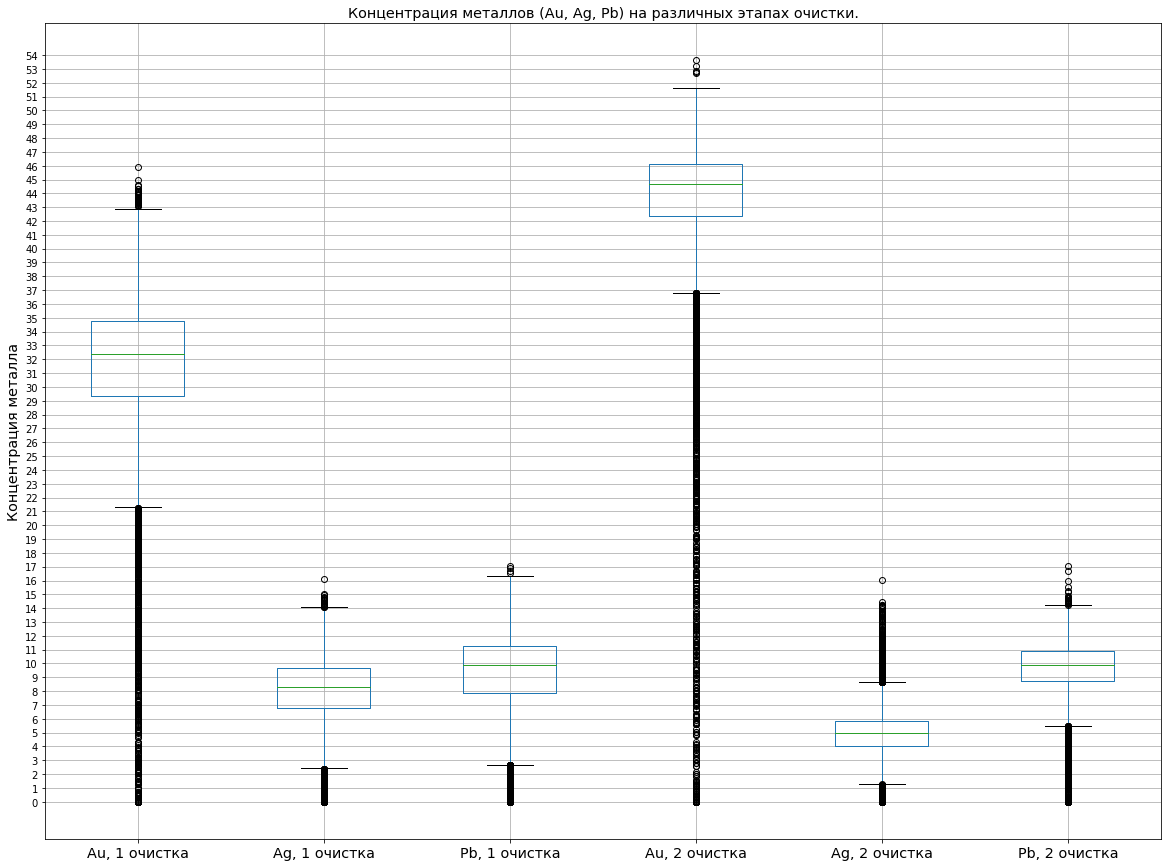

In [39]:
data_full.boxplot(column=['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 
                          'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_au', 
                          'final.output.concentrate_ag', 'final.output.concentrate_pb'], figsize=(20, 15))

plt.title('Концентрация металлов (Au, Ag, Pb) на различных этапах очистки.', fontsize='x-large');
plt.xticks([1, 2, 3, 4, 5, 6], ['Au, 1 очистка', 'Ag, 1 очистка', 'Pb, 1 очистка', 'Au, 2 очистка', 'Ag, 2 очистка', 
                                'Pb, 2 очистка'], rotation='horizontal', fontsize='x-large');

plt.yticks(range(0, 55, 1), rotation='horizontal');
plt.ylabel('Концентрация металла', fontsize='x-large');

* Концентрация золота после второй очистки составляет в среднем 45%, это на 13% больше, чем после первой очистки. Концентрация серебра после второй очистки уменьшилась на 3% и стала равной 5%, концентрация свинца осталась примерно на том же уровне 10%. Также разброс значений концентраций металлов после второй очистки меньше, чем после первой очистки. Возможно, это объясняется тем, что вторая очистка - это как вторая итерация операции над данными, при которой значения получаются ближе к некоторому среднему значению.

### 2.2 Распределение гранул сырья на обучающей и тестовой выборках

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Построим гистограммы.

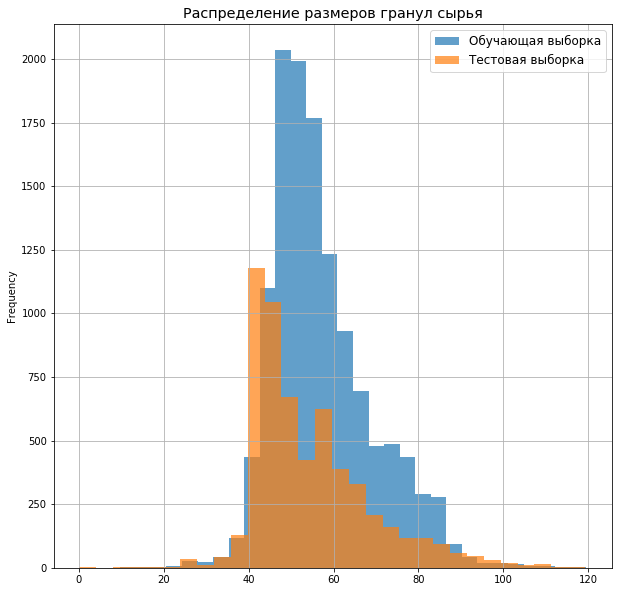

In [40]:
names = ['Обучающая выборка', 'Тестовая выборка'] # список с наименованиями распределений

# для сравнения изобразим гистограммы на одном графике
for i, k in zip([data_var, data_test_var], [0, 1]): 
    
    # примениим условие размер "гранул меньше 120" чтобы убрать выборосы и график был более наглядным
    i[i['rougher.input.feed_size'] < 120]['rougher.input.feed_size'].plot(kind='hist', bins=30, figsize=(10,10), alpha=0.7, 
                                                                          label=names[k], grid=True)
    plt.legend(fontsize='large')
plt.title('Распределение размеров гранул сырья', fontsize='x-large');

* Распределение значений на тестовой выборке смещено влево относительно распределения значений на обучающей выборке. Для более точного сравнения построим диаграммы размаха.

					Распределение размеров гранул сырья


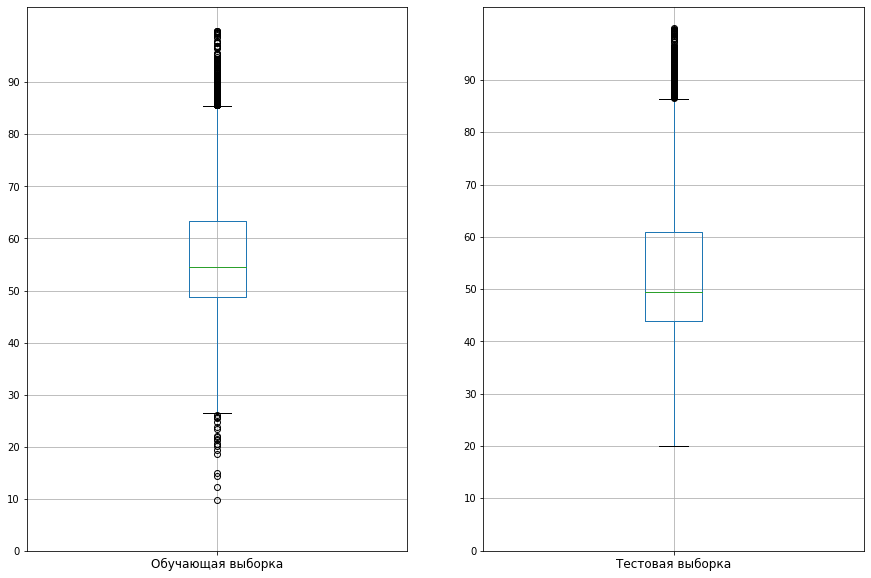

In [41]:
print('\t\t\t\t\tРаспределение размеров гранул сырья')
fig = plt.figure(figsize=(15,10));

# уберем выбросы для наглядности и установим одинаковый масштаб на графиках для удобного сравнения
data_var[data_var['rougher.input.feed_size'] < 100].boxplot(column=['rougher.input.feed_size'], ax = plt.subplot(1,2,1))
plt.yticks(range(0,100,10));
plt.xticks([1], ['Обучающая выборка'], rotation='horizontal', fontsize='large');

data_test_var[(data_test_var['rougher.input.feed_size'] < 100) & (data_test_var['rougher.input.feed_size'] > 20)] \
.boxplot(column=['rougher.input.feed_size'], ax = plt.subplot(1,2,2))
plt.yticks(range(0,100,10));
plt.xticks([1], ['Тестовая выборка'], rotation='horizontal', fontsize='large');

plt.show()

* Медиана на обучающей выборке примерно 55, на тестовой 50. Распределения отличаются, но не сильно, так что на оценку модели данный факт сильно не повлияет.

### 2.3 Суммарная концентрация всех веществ на разных стадиях

Построим распределения суммарной концентрации веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Построим гистограммы и диаграммы размаха.

In [42]:
# создадим переменную elements со списком необходимых значений концентраций
elements = [['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol'],
           ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol'],
           ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']]

# список для подписи графиков
name_pic = ['сырье', 'черновом концентрате', 'финальном концентрате']

				Суммарная концентрация всех веществ в сырье


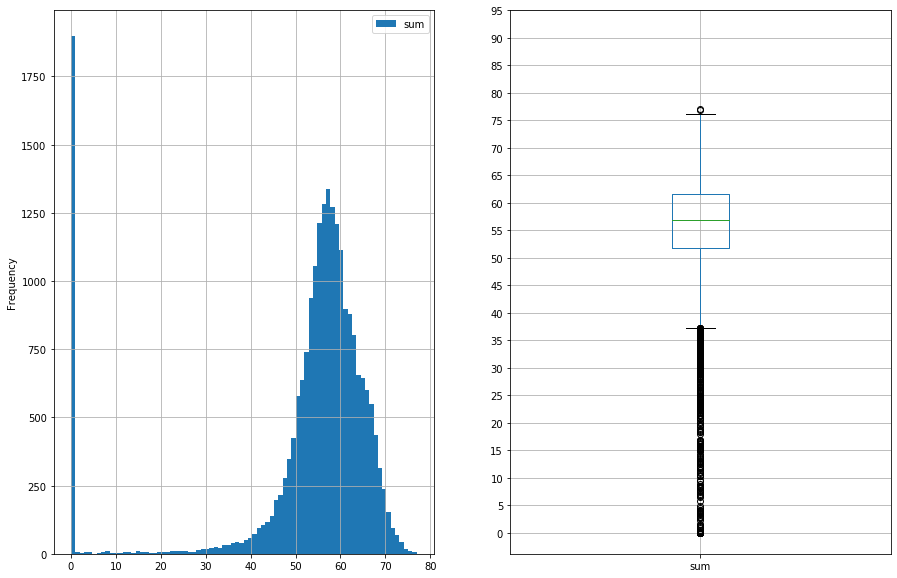

           sum
         count
sum           
0.000000  1528
0.040000   365
0.137143     1
0.204164     1
0.528696     1

				Суммарная концентрация всех веществ в черновом концентрате


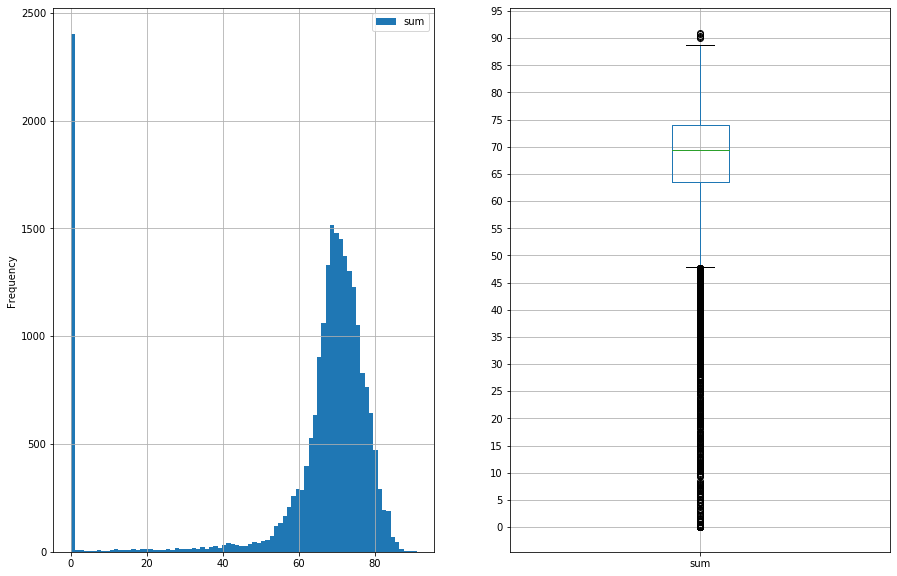

           sum
         count
sum           
0.000000  1953
0.039898     1
0.040000   439
0.046312     1
0.123221     1

				Суммарная концентрация всех веществ в финальном концентрате


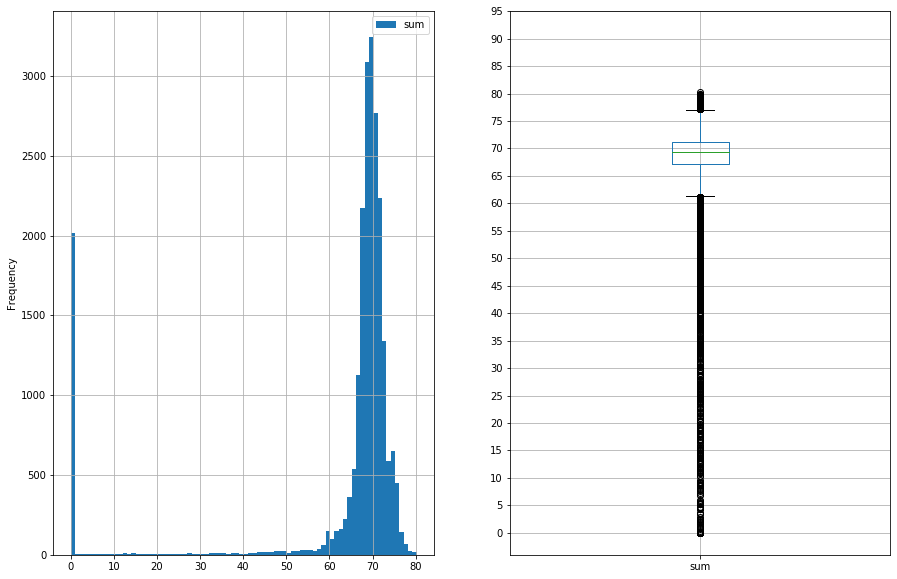

           sum
         count
sum           
0.000000  1613
0.040000   398
0.044090     1
0.179226     1
0.282257     1



In [43]:
for i, n in zip(elements, [0, 1, 2]): # для автоматизации запускаем цикл
    # складываем значения концентраций, создаем датафрейм summ и именуем колонку
    summ = pd.DataFrame(data_full[i[0]] + data_full[i[1]] + data_full[i[2]] + data_full[i[3]], columns=['sum'])
    
    # строим гистограмму и диаграмму размаха
    fig = plt.figure(figsize=(15,10));
    summ.plot(kind='hist', ax = plt.subplot(1,2,1), grid=True, bins=80);
    summ.boxplot(ax = plt.subplot(1,2,2));
    plt.yticks(range(0,100,5));
    print('\t\t\t\tСуммарная концентрация всех веществ в', name_pic[n]) # называем график
    plt.show()
    
    # выводим на экран первые 5 строк датафрейма summ, сгруппированных по колонке 'sum'
    print(summ.groupby('sum').agg({'sum':['count']}).head(5))
    print()

* В каждом распределении суммарной концентрации наблюдаются около 2000 - 2500 значений с концентрацией 0 и 0.04. Это аномалии-выбросы, так как основная масса значений находится в других интервалах. Для обучения такие значения будут только мешать, так как, скорее всего, эти значения возникли из-за неточности приборов или еще каких-то причин, но они вряд ли соответствуют действительности.


* Еще как вариант, значения с нулевой или близкой к нулю концентрации могли возникнуть, если на линию восстановления золота подается партия сырья, и сразу, каждый час, начинают снимать показания с приборов, тогда допустим на стадии флотации будут нормальные показания концентраций, а на стадиях первой и второй очистки - нет, так как туда черновой концентрат еще не пришел и т. д. на каждом этапе возникают значения с нулевой концентрацией.

Так как из тестовой выборки нельзя удалять значения, то логично предположить, что такие значения не нужно удалять и из обучающей выборки, так как модель должна научиться, что предсказывать для таких аномалий.

In [44]:
data_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12679 entries, 0 to 16859
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       12679 non-null  float64
 1   primary_cleaner.input.sulfate               12679 non-null  float64
 2   primary_cleaner.input.depressant            12679 non-null  float64
 3   primary_cleaner.input.feed_size             12679 non-null  float64
 4   primary_cleaner.input.xanthate              12679 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      12679 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    12679 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      12679 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    12679 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      12679 non-null  float64
 10  primary_cl

In [45]:
data_test_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5856 non-null   float64
 1   primary_cleaner.input.depressant            5856 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5856 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5856 non-null   float64
 10  primary_clea

Данные наконец-то готовы для обучения модели.

------

## 3. Обучение модели

### 3.1 Функции для вычисления sMAPE и подготовка признаков

Напишем функцию для вычисления итоговой sMAPE.

In [46]:
def result_sMAPE(sMAPE_rougher, sMAPE_final):
    return 0.25 * sMAPE_rougher + 0.75 * sMAPE_final

Напишем функцию для вычисления sMAPE на этапе чернового концентрата и финального концентрата.

In [47]:
def sMAPE(target, predict):
    sMAPE2 = abs(target - predict) / (abs(target) + abs(predict)) * 2 * 100
    return sMAPE2.sum() / len(target)

По условию проекта нужно спрогнозировать две величины:
* эффективность обогащения чернового концентрата - `rougher.output.recovery`
* эффективность обогащения финального концентрата - `final.output.recovery`

Поэтому нужно обучить модель для прогнозирования каждой величины, а потом посчитать итоговую метрику с помощью функции `result_sMape`. Для обучения модели для чернового концентрата, необходимы только данные этапа `rougher`, для подсчета эффективности обогащения финального концентрата необходимы все данные. Также необходимо разделить целевые признаки по двум выборкам.

In [48]:
# создаем обучающую выборку для rougher.output.recovery
data_rougher = data_var.loc[:, 'rougher.input.feed_ag' : 'rougher.state.floatbank10_f_level']

# создаем обучающую выборку для final.output.recovery
data_final = data_var.drop(['rougher.output.recovery'], axis=1)

# создаем тестовую выборку для rougher.output.recovery
data_test_rougher = data_test_var.loc[:, 'rougher.input.feed_ag' : 'rougher.state.floatbank10_f_level']
data_test_rougher['rougher.output.recovery'] = data_test_var['rougher.output.recovery']

# создаем тестовую выборку для final.output.recovery
data_test_final = data_test_var.drop(['rougher.output.recovery'], axis=1)

/home/denis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Делим каждую выборку на признаки и целевой признак.

In [49]:
# обучающие выборки
features_rougher_train = data_rougher.drop(['rougher.output.recovery'], axis=1)
target_rougher_train = data_rougher['rougher.output.recovery']

features_final_train = data_final.drop(['final.output.recovery'], axis=1)
target_final_train = data_final['final.output.recovery']

# тестовые выборки
features_rougher_test = data_test_rougher.drop(['rougher.output.recovery'], axis=1)
target_rougher_test = data_test_rougher['rougher.output.recovery']

features_final_test = data_test_final.drop(['final.output.recovery'], axis=1)
target_final_test = data_test_final['final.output.recovery']

Для прогнозирования эффективности обогащения будем обучать следующие модели: `LinearRegression()`, `SGDClassifier()` и `RandomForestRegressor()`.

Для обучения моделей признаки должны быть одинаково значимы, поэтому необходимо масштабировать признаки. Попробуем два способа - стандартизация и нормализация.

### 3.2 Стандартизация

Для каждой выборки создадим объект  `StandardScaler ` и настроим его на обучающих данных, затем преобразуем признаки обучающей и тестовой выборок функцией `transform`.

In [50]:
scaler_final = StandardScaler()
scaler_final.fit(features_final_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
features_final_train_st = scaler_final.transform(features_final_train)
features_final_test_st = scaler_final.transform(features_final_test)

In [52]:
scaler_rougher = StandardScaler()
scaler_rougher.fit(features_rougher_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
features_rougher_train_st = scaler_rougher.transform(features_rougher_train)
features_rougher_test_st = scaler_rougher.transform(features_rougher_test)

### 3.2.1 Линейная регрессия

Исследуем модель линейная регрессия.

In [54]:
model_rougher = LinearRegression()
model_rougher.fit(features_rougher_train_st, target_rougher_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
model_final = LinearRegression()
model_final.fit(features_final_train_st, target_final_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

По условию проекта необходимо оценивать качество модели кросс-валидацией. Исользуем кросс-валидацию в sklearn. По умолчанию, она оценивает качество модели методом `score()`, в нашем случае необходимо оценивать качество с помощью `sMape`. Поэтому, с помощью функции `make_scorer` создадим метрику `sMape_metric` и используем ее для оценки качества в кросс-валидации.

In [56]:
sMAPE_metric = make_scorer(sMAPE)

Применим функцию `cross_val_score` к нашим моделям, число блоков для кросс-валидации примем 10, в качестве метрики используем `sMape_metric`. Сохраним результаты расчета в переменных `predict_rougher` и `predict_final`.

In [57]:
predict_rougher = cross_val_score(model_rougher, features_rougher_train_st, target_rougher_train, cv=10, scoring=sMAPE_metric)

In [58]:
predict_final = cross_val_score(model_final, features_final_train_st, target_final_train, cv=10, scoring=sMAPE_metric)

Посчитаем итоговое sMAPE, на вход подаем средние от полученных выше результатов.

In [59]:
result = result_sMAPE(predict_rougher.mean(),predict_final.mean())
print('Итоговое sMAPE = {:.1f} %.'.format(result))

Итоговое sMAPE = 9.7 %.


### 3.2.2 SGDRegressor

Исследуем модель `SGDRegressor`.

In [60]:
model_rougher = linear_model.SGDRegressor(random_state=12345, loss='epsilon_insensitive', penalty='l2', l1_ratio=0, 
                                          learning_rate='adaptive', eta0=0.001)
model_rougher.fit(features_rougher_train_st, target_rougher_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0,
             learning_rate='adaptive', loss='epsilon_insensitive',
             max_iter=1000, n_iter_no_change=5, penalty='l2', power_t=0.25,
             random_state=12345, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
model_final = linear_model.SGDRegressor(random_state=12345, loss='epsilon_insensitive', penalty='l1', l1_ratio=1,
                                       learning_rate='adaptive', eta0=0.001)
model_final.fit(features_final_train_st, target_final_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=1,
             learning_rate='adaptive', loss='epsilon_insensitive',
             max_iter=1000, n_iter_no_change=5, penalty='l1', power_t=0.25,
             random_state=12345, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:
predict_rougher = cross_val_score(model_rougher, features_rougher_train_st, target_rougher_train, cv=10, scoring=sMAPE_metric)

In [63]:
predict_final = cross_val_score(model_final, features_final_train_st, target_final_train, cv=10, scoring=sMAPE_metric)

In [64]:
result = result_sMAPE(predict_rougher.mean(),predict_final.mean())
print('Итоговое sMAPE = {:.1f} %.'.format(result))

Итоговое sMAPE = 9.3 %.


### 3.2.3 RandomForestRegressor

Исследуем модель RandomForestRegressor. Для начала попробуем подобрать параметры, при которых модель покажел лучшие результаты.
Будем перебирать следующие гиперпараметры: `n_estimators`, `min_samples_split`, `min_samples_leaf`. Код перебора закомментирован, так как перебор параметров занимает довольно продолжительное время.

In [65]:
numbers = list(range(50, 101, 5))
numbers_1 = list(range(10, 21, 1))
numbers_2 = list(range(4, 15, 1))

In [66]:
#for i, n, k in zip(numbers, numbers_1, numbers_2):
    #model_rougher = RandomForestRegressor(n_estimators=i, random_state=12345, min_samples_split=n, min_samples_leaf=k)
    #model_rougher.fit(features_rougher_train_st, target_rougher_train)
    #predict_rougher = cross_val_score(model_rougher, features_rougher_train_st, target_rougher_train, cv=5, scoring=sMAPE_metric)
    #print(predict_rougher.mean())

In [67]:
#for i, n, k in zip(numbers, numbers_1, numbers_2):
    #model_final = RandomForestRegressor(n_estimators=i, random_state=12345, min_samples_split=n, min_samples_leaf=k)
    #model_final.fit(features_final_train_st, target_final_train)
    #predict_final = cross_val_score(model_final, features_final_train_st, target_final_train, cv=5, scoring=sMAPE_metric)
    #print(predict_final.mean())

Были получены оптимальные гиперпараметры и с ними обучим модели. По аналогии с линейной регрессией, оцениваем модель кросс-валидацией, только для ускорения расчета используем 5 блоков для кросс-валидации.

In [68]:
model_rougher = RandomForestRegressor(n_estimators=90, random_state=12345, min_samples_split=18, min_samples_leaf=12)
model_rougher.fit(features_rougher_train_st, target_rougher_train)
predict_rougher = cross_val_score(model_rougher, features_rougher_train_st, target_rougher_train, cv=5, scoring=sMAPE_metric)

In [69]:
model_final = RandomForestRegressor(n_estimators=70, random_state=12345, min_samples_split=16, min_samples_leaf=10)
model_final.fit(features_final_train_st, target_final_train)
predict_final = cross_val_score(model_final, features_final_train_st, target_final_train, cv=5, scoring=sMAPE_metric)

In [70]:
result = result_sMAPE(predict_rougher.mean(),predict_final.mean())
print('Итоговое sMAPE = {:.1f} %.'.format(result))

Итоговое sMAPE = 9.8 %.


### 3.3 Нормализация

Проведем нормализацию данных и исследуем модели `LinearRegression()` и `RandomForestRegressor()`.

In [71]:
transformer_final = Normalizer().fit(features_final_train)

In [72]:
features_final_train_norm = transformer_final.transform(features_final_train)
features_final_test_norm = transformer_final.transform(features_final_test)

In [73]:
transformer_rougher = Normalizer().fit(features_rougher_train)

In [74]:
features_rougher_train_norm = scaler_rougher.transform(features_rougher_train)
features_rougher_test_norm = scaler_rougher.transform(features_rougher_test)

### 3.3.1 Линейная регрессия

In [75]:
model_rougher = LinearRegression()
model_rougher.fit(features_rougher_train_norm, target_rougher_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
model_final = LinearRegression()
model_final.fit(features_final_train_norm, target_final_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
predict_rougher = cross_val_score(model_rougher, features_rougher_train_norm, target_rougher_train, cv=10, scoring=sMAPE_metric)
predict_final = cross_val_score(model_final, features_final_train_norm, target_final_train, cv=10, scoring=sMAPE_metric)

In [78]:
result = result_sMAPE(predict_rougher.mean(),predict_final.mean())
print('Итоговое sMAPE = {:.1f} %.'.format(result))

Итоговое sMAPE = 9.6 %.


### 3.3.2 SGDRegressor

In [79]:
model_rougher = linear_model.SGDRegressor(random_state=12345, loss='epsilon_insensitive', penalty='l2', l1_ratio=0, 
                                          learning_rate='adaptive', eta0=0.001)
model_rougher.fit(features_rougher_train_norm, target_rougher_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0,
             learning_rate='adaptive', loss='epsilon_insensitive',
             max_iter=1000, n_iter_no_change=5, penalty='l2', power_t=0.25,
             random_state=12345, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [80]:
model_final = linear_model.SGDRegressor(random_state=12345, loss='epsilon_insensitive', penalty='l2', l1_ratio=0, 
                                          learning_rate='adaptive', eta0=0.001)
model_final.fit(features_final_train_norm, target_final_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0,
             learning_rate='adaptive', loss='epsilon_insensitive',
             max_iter=1000, n_iter_no_change=5, penalty='l2', power_t=0.25,
             random_state=12345, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
predict_rougher = cross_val_score(model_rougher, features_rougher_train_norm, target_rougher_train, cv=10, scoring=sMAPE_metric)

In [82]:
predict_final = cross_val_score(model_final, features_final_train_norm, target_final_train, cv=10, scoring=sMAPE_metric)

In [83]:
result = result_sMAPE(predict_rougher.mean(),predict_final.mean())
print('Итоговое sMAPE = {:.1f} %.'.format(result))

Итоговое sMAPE = 9.8 %.


### 3.3.3 RandomForestRegressor

Аналогично подберем гиперпараметры для модели `RandomForestRegressor`.

In [84]:
#for i, n, k in zip(numbers, numbers_1, numbers_2):
    #model_rougher = RandomForestRegressor(n_estimators=i, random_state=12345, min_samples_split=n, min_samples_leaf=k)
    #model_rougher.fit(features_rougher_train_norm, target_rougher_train)
    #predict_rougher = cross_val_score(model_rougher, features_rougher_train_norm, target_rougher_train, cv=5, scoring=sMAPE_metric)
    #print(predict_rougher.mean())

In [85]:
#for i, n, k in zip(numbers, numbers_1, numbers_2):
   # model_final = RandomForestRegressor(n_estimators=i, random_state=12345, min_samples_split=n, min_samples_leaf=k)
    #model_final.fit(features_rougher_train_norm, target_final_train)
   # predict_final = cross_val_score(model_final, features_rougher_train_norm, target_final_train, cv=5, scoring=sMAPE_metric)
    #print(predict_final.mean())

Обучим модели и посчитаем итоговое sMape.

In [86]:
model_rougher = RandomForestRegressor(n_estimators=90, random_state=12345, min_samples_split=18, min_samples_leaf=12)
model_rougher.fit(features_rougher_train_norm, target_rougher_train)
predict_rougher = cross_val_score(model_rougher, features_rougher_train_norm, target_rougher_train, cv=5, scoring=sMAPE_metric)

In [87]:
model_final = RandomForestRegressor(n_estimators=80, random_state=12345, min_samples_split=16, min_samples_leaf=10)
model_final.fit(features_final_train_norm, target_final_train)
predict_final = cross_val_score(model_final, features_final_train_norm, target_final_train, cv=5, scoring=sMAPE_metric)

In [88]:
result = result_sMAPE(predict_rougher.mean(),predict_final.mean())
print('Итоговое sMAPE = {:.1f} %.'.format(result))

Итоговое sMAPE = 10.0 %.


Лучшая модель `SGDRegressor`, обученная на стандартизованных данных. Итоговое `sMAPE` = 9.3 %

------

## 4. Проверка модели на тестовой выборке

Проверим модель на тестовой выборке. Возьмем стандартизованные значения и подобранные гиперпараметры.

In [89]:
model_rougher = linear_model.SGDRegressor(random_state=12345, loss='epsilon_insensitive', penalty='l2', l1_ratio=0, 
                                          learning_rate='adaptive', eta0=0.001)
model_rougher.fit(features_rougher_test_st, target_rougher_test)
predict_rougher = cross_val_score(model_rougher, features_rougher_test_st, target_rougher_test, cv=10, scoring=sMAPE_metric)

In [90]:
model_final = linear_model.SGDRegressor(random_state=12345, loss='epsilon_insensitive', penalty='l1', l1_ratio=1,
                                       learning_rate='adaptive', eta0=0.001)
model_final.fit(features_final_test_st, target_final_test)
predict_final = cross_val_score(model_final, features_final_test_st, target_final_test, cv=10, scoring=sMAPE_metric)

Посчитаем итоговое sMAPE и сравним результат с sMAPE "глупой" модели, которая предсказывает среднее значение эффективности обогащения.

In [91]:
result = result_sMAPE(predict_rougher.mean(),predict_final.mean())
print('Итоговое sMAPE = {:.1f} %.'.format(result))

result_random = result_sMAPE(target_rougher_test.mean(),target_final_test.mean())
print('Случайная модель sMAPE = {:.1f} %.'.format(result_random))

Итоговое sMAPE = 9.2 %.
Случайная модель sMAPE = 72.5 %.


Модель успешно прошла проверку на адекватность.

Посмотрим на средние значения эффективности обогащения, которые предсказывает модель. Воспользуемся функцией `cross_val_predict`.

In [92]:
rec_rougher = cross_val_predict(model_rougher, features_rougher_test_st, target_rougher_test, cv=10)

In [93]:
rec_final = cross_val_predict(model_final, features_final_test_st, target_final_test, cv=10)

Выведем на экран посчитанные средние значения эффективностей обогащения.

In [94]:
print('Среднее значение эффективности обогащения чернового концентрата {:.1f} %.'.format(rec_rougher.mean()))

Среднее значение эффективности обогащения чернового концентрата 87.2 %.


In [95]:
print('Среднее значение эффективности обогащения финального концентрата {:.1f} %.'.format(rec_final.mean()))

Среднее значение эффективности обогащения финального концентрата 68.8 %.


Посчитаем общее значение эффективности обогащения, воспользуемся функцией `result_sMAPE`.

In [96]:
rec_result = result_sMAPE(rec_rougher.mean(),rec_final.mean())
print('Среднее значение эффективности обогащения золотосодержащей руды {:.1f} % ± {:.1f} %.'.format(rec_result, result))

Среднее значение эффективности обогащения золотосодержащей руды 73.4 % ± 9.2 %.


Таким образом, получим коэффициент восстановления золота:

In [97]:
print('Коэффициент восстановления золота {:.2f} ± {:.2f}.'.format(rec_result / 100, result / 100))

Коэффициент восстановления золота 0.73 ± 0.09.


------

## Выводы

### Описание работы.

Цель проекта - предсказание коэффициента восстановления золота. 

Для исследования были предоставлены три выборки: обучающая, тестовая и исходные данные. В данных обнаружилось достаточное количество пропусков. ~~Пропуски было решено удалить, также из данных были удалены аномальные значения концентраций веществ.~~
Пропуски были удалены из обучающей выборки, в тестовой выборке пропуски были заменены ближайшими значениями, либо медианами значений. Из обучающей выборки были удалены столбцы, которые отсутствовали в тестовой выборке. А к тестовой выборки были добавлены целевые признаки, чтобы корректно оценить предсказания модели.


Был проведен исследовательский анализ данных.


В качестве моделей для обучения были выбраны модели *LinearRegression*, *SGDRegressor* и *RandomForestRegressor*. Обучения моделей проводилось на стандартизованных и нормализованных данных. Лучший результат получился у модели *SGDRegressor* на стандартизованных данных.

### Результаты работы

Сведем полученные результаты в таблицу.

Характеристика | Значение
:--- | :---:
Итоговое значение метрики sMAPE | 9.2 %
 | 
Среднее значение эффективности обогащения чернового концентрата | 87.2 %
Среднее значение эффективности обогащения финального концентрата | 68.8 %
Среднее значение эффективности обогащения золотосодержащей руды | 73.4 ± 9.2 %
 | 
Коэффициент восстановления золота | 0.73 ± 0.09

------